### X-ray 분류 모형-Male

In [1]:
import tensorflow as tf  

gpus = tf.config.experimental.list_physical_devices('GPU')  
print(gpus)  

if gpus:  
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:
import glob
from PIL import Image
import numpy as np
import glob

all_images=[]
all_labels=[]
filenames=[]
ages=[]

img_size=(80,100)

for f in glob.glob('c:\\workspace3\\data\\images\\xray\\**\\*.jpg', recursive=True):
    arr=f.split('\\')
    arr2=arr[5].split("_")
    if arr2[1]=='M':
        img = Image.open(f)
        filenames.append(arr[-1])
        img_resize = img.resize((img_size[0], img_size[1]))
        all_images.append(img_resize)
        age=int(arr2[2].replace('yr',''))
        ages.append(age)

In [11]:
filenames[:10]

['332_M.jpg',
 '333_M.jpg',
 '334_M.jpg',
 '335_M.jpg',
 '336_M.jpg',
 '337_M.jpg',
 '338_M.jpg',
 '339_M.jpg',
 '340_M.jpg',
 '341_M.jpg']

In [12]:
items=list(zip(filenames,ages,all_images))
items[:10]

[('332_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('333_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('334_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('335_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('336_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('337_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('338_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('339_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('340_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>),
 ('341_M.jpg', 10, <PIL.Image.Image image mode=RGB size=80x100>)]

In [13]:
len(all_images)

665

In [14]:
np.array(all_images[0]).shape

(100, 80, 3)

In [15]:
X=np.empty((1,img_size[0],img_size[1],3))

for img in all_images:
    X=np.vstack((X,np.array(img).reshape(1,img_size[0],img_size[1],3)))

X.shape    

(666, 80, 100, 3)

In [16]:
X = np.delete(X, (0), axis=0)

In [17]:
X.shape

(665, 80, 100, 3)

In [18]:
y=np.array(ages)
y[:10]

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

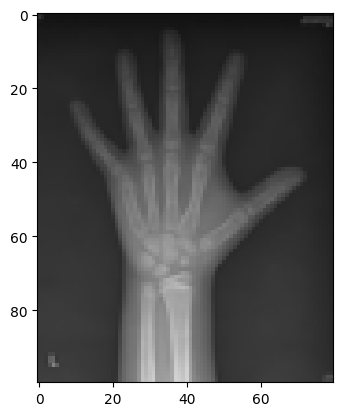

In [19]:
import matplotlib.pyplot as plt

plt.imshow(all_images[0])

plt.show()

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True,  random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((532, 80, 100, 3), (133, 80, 100, 3), (532,), (133,))

In [21]:
import pandas as pd

pd.DataFrame(y_train).value_counts()

4     40
5     40
6     40
7     40
8     40
9     40
10    40
11    40
12    40
13    40
14    40
15    36
3     25
16    24
17     7
Name: count, dtype: int64

In [22]:
X_train=X_train.reshape(-1,img_size[0]*img_size[1]*3)
X_test=X_test.reshape(-1,img_size[0]*img_size[1]*3)

In [23]:
X_train=X_train/255.
X_test=X_test/255.

In [24]:
X_train=X_train.reshape(-1,img_size[0],img_size[1],3)
X_test=X_test.reshape(-1,img_size[0],img_size[1],3)

In [25]:
from tensorflow.keras import utils

y_train_backup=y_train
y_test_backup=y_test

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model=Sequential()

model.add(Conv2D(64,(3,3),padding="same", input_shape=X_train.shape[1:],activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Flatten())

model.add(Dense(64,activation="relu"))
model.add(Dense(1))          

model.compile(optimizer="rmsprop", loss="mae",metrics=["mae"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 80, 100, 64)       1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 48, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 19, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 22, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 23936)             0

In [27]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((532, 80, 100, 3), (532,), (133, 80, 100, 3), (133,))

In [28]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("c:/data/model/xray_m_best.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
hist = model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=30, callbacks=[checkpoint])

Epoch 1/30
14/14 [==============================] - ETA: 0s - loss: 6.5353 - mae: 6.5353
Epoch 1: val_loss improved from inf to 3.36905, saving model to c:/data/model\xray_m_best.h5
14/14 [==============================] - 4s 79ms/step - loss: 6.5353 - mae: 6.5353 - val_loss: 3.3691 - val_mae: 3.3691
Epoch 2/30
13/14 [==========================>...] - ETA: 0s - loss: 3.7815 - mae: 3.7815
Epoch 2: val_loss improved from 3.36905 to 3.21816, saving model to c:/data/model\xray_m_best.h5
14/14 [==============================] - 1s 43ms/step - loss: 3.8217 - mae: 3.8217 - val_loss: 3.2182 - val_mae: 3.2182
Epoch 3/30
13/14 [==========================>...] - ETA: 0s - loss: 3.9277 - mae: 3.9277
Epoch 3: val_loss did not improve from 3.21816
14/14 [==============================] - 1s 38ms/step - loss: 3.9189 - mae: 3.9189 - val_loss: 3.5597 - val_mae: 3.5597
Epoch 4/30
13/14 [==========================>...] - ETA: 0s - loss: 3.8387 - mae: 3.8387
Epoch 4: val_loss improved from 3.21816 to 3.12

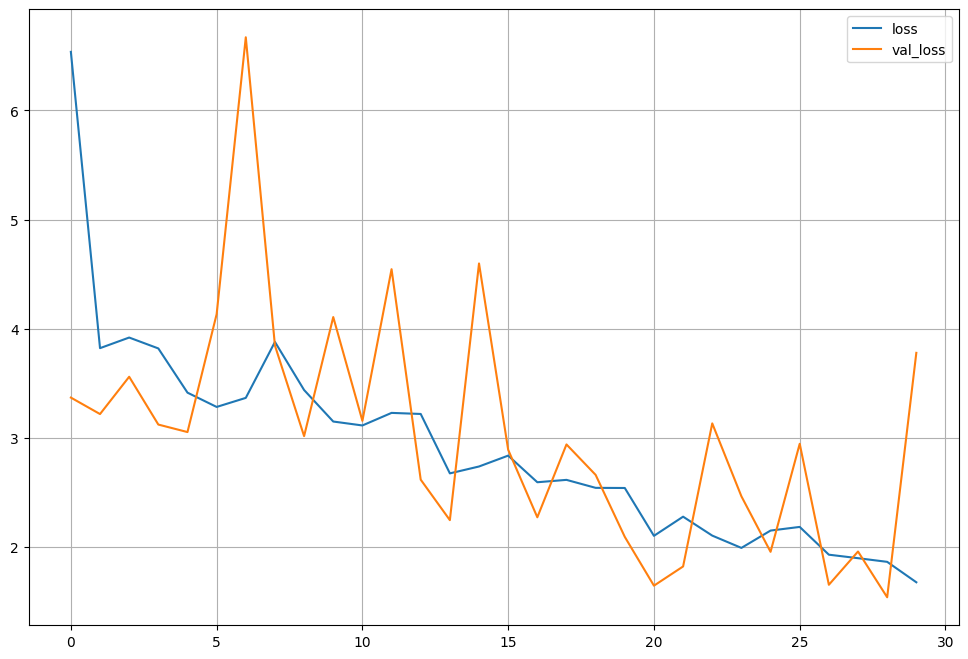

In [29]:
plt.figure(figsize=(12,8))

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.grid()

plt.show()

In [30]:
from tensorflow.keras.models import load_model

model = load_model('c:/data/model/xray_m_best.h5')
scores = model.evaluate(X_train, y_train, verbose=1)
print(scores)

17/17 [==============================] - 0s 17ms/step - loss: 1.4042 - mae: 1.4042
[1.4042352437973022, 1.4042352437973022]


In [31]:
pred=model.predict(X_test)
pred[:5]

5/5 [==============================] - 0s 28ms/step


array([[ 9.084891 ],
       [ 4.6043096],
       [11.839683 ],
       [12.61987  ],
       [ 4.583878 ]], dtype=float32)

In [32]:
y_test[:5]

array([10,  9, 13, 11,  5])